In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\ELCOT\Documents\projects\survey_results_public.csv")

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [35]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [6]:
df = df[['Country','EdLevel','Employment','ConvertedComp']]
df = df.rename({'ConvertedComp': 'salary'},axis=1)
df.head()

,Country,EdLevel,Employment,salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN


In [7]:
df = df[df['salary'].notnull()]
df.head()

,Country,EdLevel,Employment,salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",Employed full-time,38916.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34756 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     34756 non-null  object 
 1   EdLevel     34188 non-null  object 
 2   Employment  34717 non-null  object 
 3   salary      34756 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.3+ MB


In [39]:
df = df.dropna()
df.isnull().sum()


Country       0
EdLevel       0
Employment    0
salary        0
dtype: int64

In [40]:
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30127 entries, 7 to 64154
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  30127 non-null  object 
 1   EdLevel  30127 non-null  object 
 2   salary   30127 non-null  float64
dtypes: float64(1), object(2)
memory usage: 941.5+ KB


In [41]:
df['Country'].value_counts()

Country
United States     7583
India             2444
United Kingdom    2291
Germany           1913
Canada            1186
                  ... 
Swaziland            1
Niger                1
Belize               1
Yemen                1
Andorra              1
Name: count, Length: 154, dtype: int64

In [42]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'other'
    return categorical_map


In [46]:
df.columns

Index(['Country', 'EdLevel', 'salary'], dtype='object')

In [47]:
df['Country']

7         United States
9        United Kingdom
10       United Kingdom
11                Spain
12          Netherlands
              ...      
64135           Denmark
64148          Colombia
64152     United States
64153             Chile
64154             Japan
Name: Country, Length: 30127, dtype: object

In [49]:
country_map = shorten_categories(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Country
other                 8585
United States         7583
India                 2444
United Kingdom        2291
Germany               1913
Canada                1186
Brazil                 993
France                 974
Spain                  672
Australia              661
Netherlands            656
Poland                 567
Italy                  562
Russian Federation     525
Sweden                 515
Name: count, dtype: int64

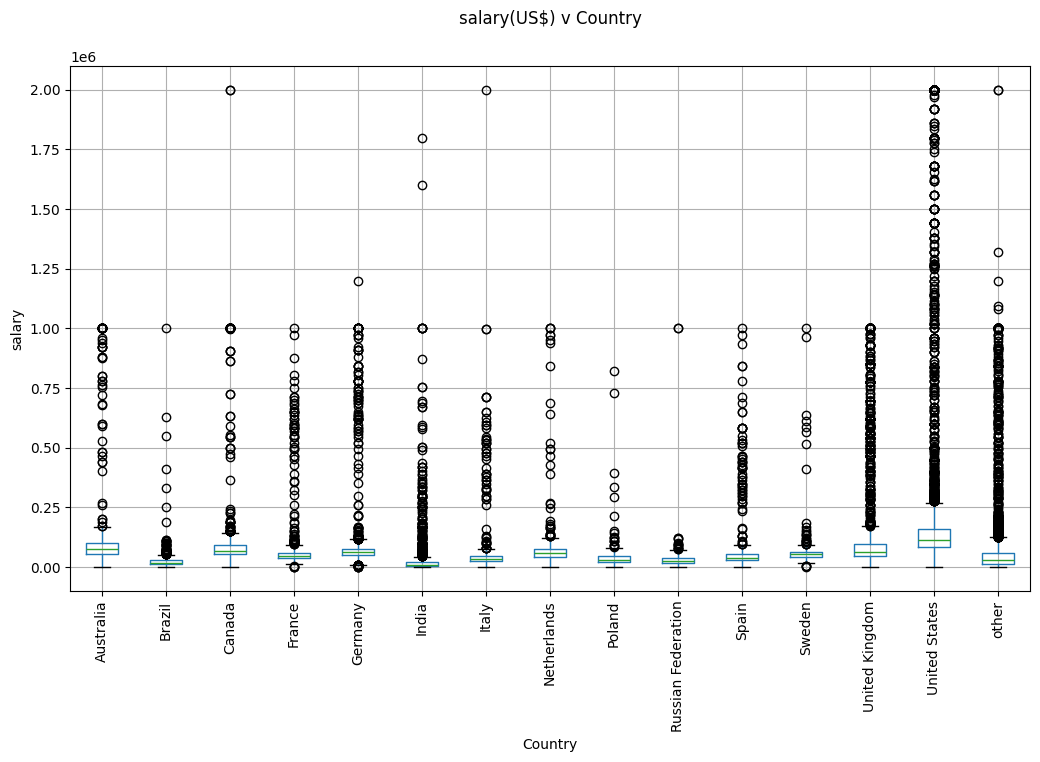

In [54]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('salary','Country', ax=ax)
plt.suptitle('salary(US$) v Country')
plt.title('')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()

In [8]:
df = df[df['salary'] <= 250000]
df = df[df['salary'] >= 10000]
df = df[df['Country'] != 'other']



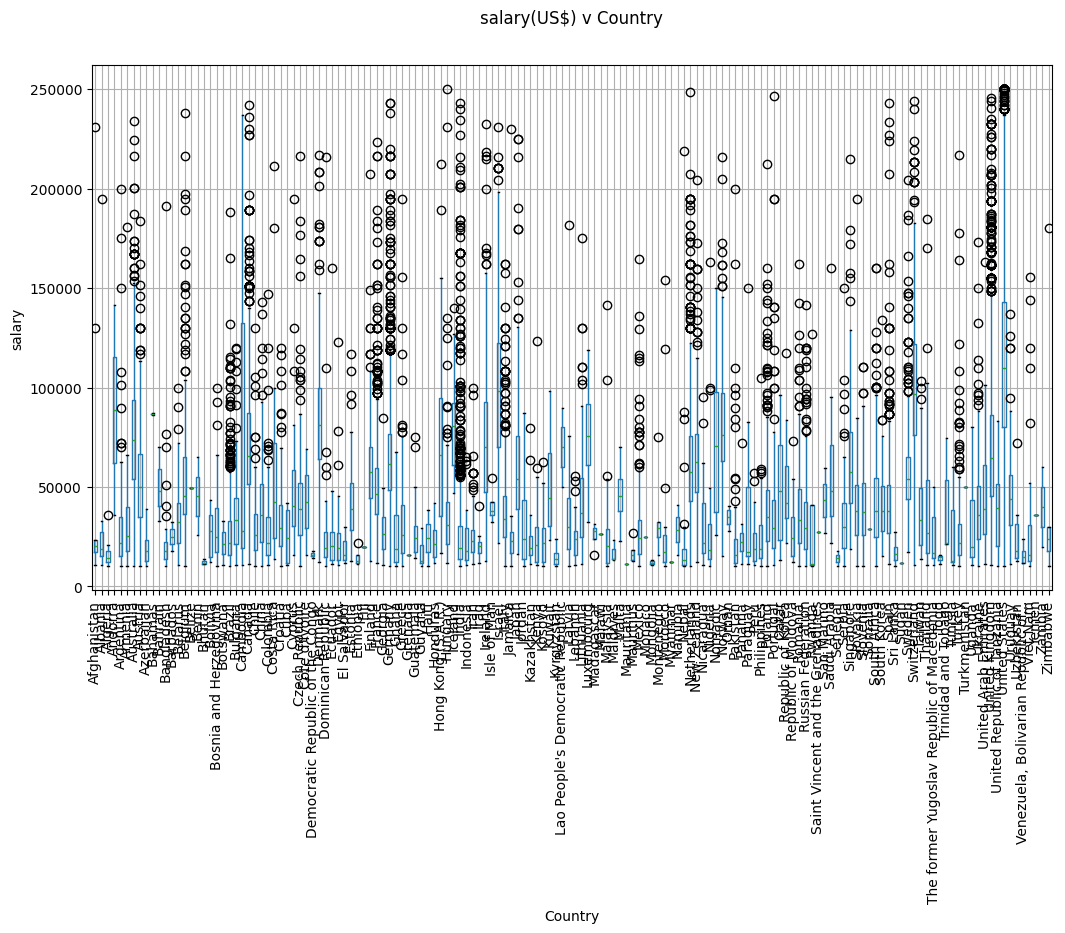

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('salary','Country', ax=ax)
plt.suptitle('salary(US$) v Country')
plt.title('')
plt.ylabel('salary')
plt.xticks(rotation=90)
plt.show()